In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random
import math
import time
import copy
import pickle
import sys

In [2]:
basedir = '/Users/anamaria/git/biosens/blob_detection'
sys.path.append(basedir)
from particle import Circle
import smc

In [3]:
nice_fonts = {"text.usetex": True,
            "font.family": "serif",
            "font.serif" : "Times New Roman"}
plt.rcParams.update(nice_fonts)

plt.rc('font', family='serif', size=19)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)


In [4]:
#for runnning the modified function
%load_ext autoreload
%autoreload 2

### Testing np.random.choice outcome

In [7]:
l = [0,1,2,3]
p = [0.4,0.3,0.2,0.1]

In [24]:
np.random.choice(l, size=4,p=p, replace = True)

array([2, 0, 1, 2])

In [25]:

np.random.choice(l, size=4,p=p, replace = False)

array([1, 2, 0, 3])

In [31]:
for i in range(4):
    print(np.random.choice(l, p=p, replace = True))

2
1
3
1


In [32]:
for i in range(4):
    print(np.random.choice(l, p=p, replace = False))

3
1
0
0


# Running SMC


Set the attributes of the Circle object for generating a synthetic image array.

In [5]:
syntx = 4.0
synty = 6.0
syntr = 3.0
synti = 10.0

Generate the image with the above attributes.

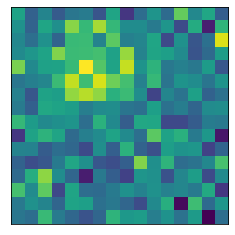

In [9]:
syntcircle = smc.generate_particles(1, variance = 20, coord = [[syntx, synty, syntr, synti]], 
                                baseline_value=0, add_noise = True)
fig, ax = plt.subplots(1,1)
plt.imshow(syntcircle[0].image_array_noise)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/part1010051251000n20.png', format = 'png', dpi=400, bbox_inches='tight')

Set the number of particles to be generated, the resampling steps and the Gaussian variance for calculating the weight of each particle.

In [10]:
particle_number = 500
resampling_steps = 1000 # changed
gaussian_variance = 10 # changed

Generate the particles.

In [11]:
start = time.time()

particle_list = smc.generate_particles(particle_number, baseline_value = 0, random=True)


end = time.time()
print(end - start)

25.794844150543213


Re-sample the particles. (It takes around 6 minutes to run it for 50 steps and 100 particles.)

In [12]:
initial_meanx, initial_meany, initial_meanr, initial_meani = smc.get_mean(particle_list)
initial_varx, initial_vary, initial_varr, initial_vari = smc.get_var(particle_list)
print(initial_meanx, initial_meany, initial_meanr, initial_meani)
print(initial_varx, initial_vary, initial_varr, initial_vari)

8.128345878459129 7.5859249460562825 4.511696158189716 40.65865869305515
20.86175965804722 19.92358934041895 4.185669544168596 514.0937197942536


In [13]:
start = time.time()
resampled_items = []

resampled_mean, resampled_var, resampled_items, weights = smc.get_resampled_particles(resampling_steps, 
                                                                         len(particle_list), 
                                                                         particle_list,
                                                                         syntcircle[0].image_array_noise, 
                                                                         gaussian_variance)
end = time.time()
print(end - start)

55165.609630823135


Save the results using pickle.

In [14]:
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/pickles/500_1000_n20i10_mean.pickle", "wb") as output_file:
    pickle.dump(resampled_mean, output_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/pickles/500_1000_n20i10_var.pickle", "wb") as output_file:
    pickle.dump(resampled_var, output_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/pickles/500_1000_n20i10_items.pickle", "wb") as output_file:
    pickle.dump(resampled_items, output_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/pickles/500_1000_n20i10_weights.pickle", "wb") as output_file:
    pickle.dump(weights, output_file)
   

Or check old results saved with pickle.

In [26]:
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/500_1000_n5i10_mean.pickle", "rb") as input_file:
    resampled_mean = pickle.load(input_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/500_1000_n5i10_var.pickle", "rb") as input_file:
    resampled_var = pickle.load(input_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/500_1000_n5i10_items.pickle", "rb") as input_file:
    resampled_items = pickle.load(input_file)
with open(r"/Users/anamaria/Desktop/thesis_pictures/smc/500_1000_n5i10_weights.pickle", "rb") as input_file:
    weights = pickle.load(input_file)
   
    

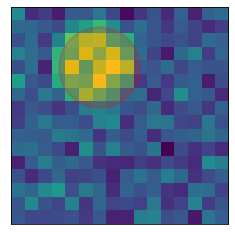

In [204]:
ax,fig =  syntcircle[0].add_circles((resampled_mean[-1][1], 
                                     resampled_mean[-1][0],
                                     resampled_mean[-1][2]))

fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/partcirc1010051251000n5.png', format = 'png', dpi=400, bbox_inches='tight')

# Plots 

## Mean

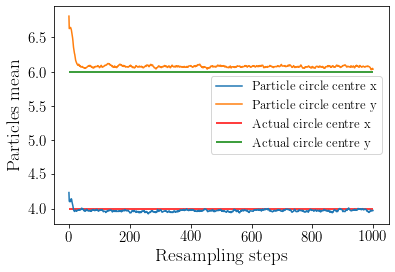

In [187]:
import pylab as plt
fig, ax = plt.subplots(1,1)
plt.plot(np.arange(resampling_steps),[y[0] for y in resampled_mean], label = 'Particle circle centre x')

plt.hlines(4,xmin = 0, xmax= resampling_steps ,color = 'red', label = 'Actual circle centre x')

plt.plot(np.arange(resampling_steps),[y[1] for y in resampled_mean], label = 'Particle circle centre y')

plt.hlines(6,xmin = 0, xmax= resampling_steps ,color = 'green', label = 'Actual circle centre y')

plt.xlabel('Resampling steps')
plt.ylabel('Particles mean')
plt.legend(fontsize = 13, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/mean1010051251000n5xy.png', format = 'png', dpi=400, bbox_inches='tight')

#plt.ylim((0,16))

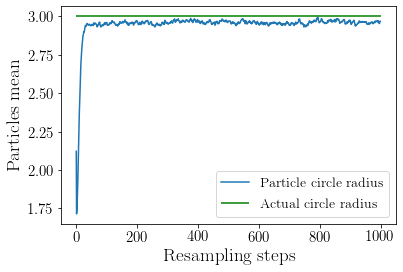

In [188]:
fig, ax = plt.subplots(1,1)
plt.plot(np.arange(resampling_steps),[y[2] for y in resampled_mean], label = 'Particle circle radius')
plt.hlines(3,xmin = 0, xmax= resampling_steps ,color = 'green', label = 'Actual circle radius')
plt.xlabel('Resampling steps')
plt.ylabel('Particles mean')
plt.legend()
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/mean1010051251000n5r.png', format = 'png', dpi=400, bbox_inches='tight')
plt.legend(fontsize = 14, loc = 'best')
#plt.ylim((0,16))

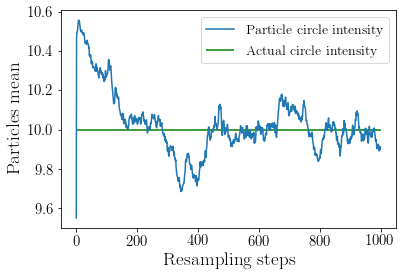

In [205]:
fig, ax = plt.subplots(1,1)
plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_mean], label = 'Particle circle intensity')
#plt.ylim((0,180))

plt.hlines(10,xmin = 0, xmax= resampling_steps ,color = 'green', label = 'Actual circle intensity')
plt.xlabel('Resampling steps')
plt.ylabel('Particles mean')
plt.legend(fontsize = 14, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/mean1010051251000n5i.png', format = 'png', dpi=400, bbox_inches='tight')

## Variance

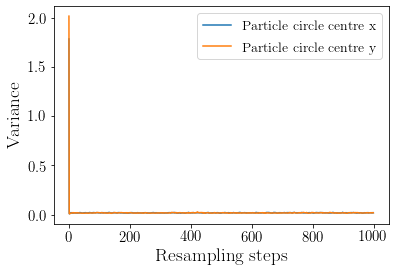

In [190]:
import pylab as plt
fig, ax = plt.subplots(1,1)
plt.plot(np.arange(resampling_steps),[y[0] for y in resampled_var], label = 'Particle circle centre x')

#plt.hlines(4,xmin = 0, xmax= resampling_steps ,color = 'red')

plt.plot(np.arange(resampling_steps),[y[1] for y in resampled_var], label = 'Particle circle centre y')

#plt.hlines(6,xmin = 0, xmax= resampling_steps ,color = 'green')

plt.xlabel('Resampling steps')
plt.ylabel('Variance')
plt.legend(fontsize = 14, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/var1010051251000n5xy.png', format = 'png', dpi=400, bbox_inches='tight')

#plt.ylim((0,16))

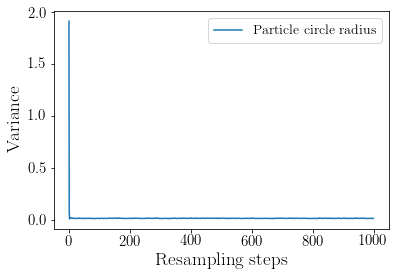

In [191]:
import pylab as plt
fig, ax = plt.subplots(1,1)

plt.plot(np.arange(resampling_steps),[y[2] for y in resampled_var], label = 'Particle circle radius')



#plt.hlines(6,xmin = 0, xmax= resampling_steps ,color = 'green')

plt.xlabel('Resampling steps')
plt.ylabel('Variance')
plt.legend(fontsize = 14, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/var1010051251000n5r.png', format = 'png', dpi=400, bbox_inches='tight')

#plt.ylim((0,16))

In [ ]:
import pylab as plt
fig, ax = plt.subplots(1,1)

plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_var], label = 'Particle circle intensity')

#plt.hlines(6,xmin = 0, xmax= resampling_steps ,color = 'green'
#plt.ylim(0,0.3)
plt.xlabel('Resampling steps')
plt.ylabel('Variance')
plt.legend(fontsize = 14, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/var1010051251000n5i.png', format = 'png', dpi=400, bbox_inches='tight')



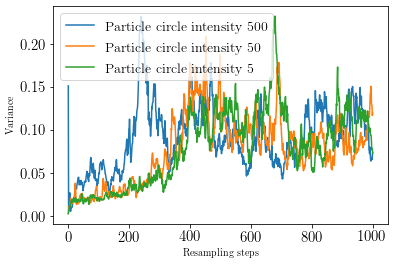

In [17]:
import pylab as plt
fig, ax = plt.subplots(1,1)


plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_var_n005i25], label = 'Particle circle intensity 500')
plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_var_n05i25], label = 'Particle circle intensity 50')
plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_var_n5i25], label = 'Particle circle intensity 5')
plt.plot(np.arange(resampling_steps),[y[3] for y in resampled_var_n5i10], label = 'Particle circle intensity 5')

#plt.hlines(6,xmin = 0, xmax= resampling_steps ,color = 'green'
#plt.ylim(0,0.3)
plt.xlabel('Resampling steps')
plt.ylabel('Variance')
plt.legend(fontsize = 14, loc = 'best')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/var_all.png', format = 'png', dpi=400, bbox_inches='tight')



## Histograms

In [94]:
intensity_list = []
radius_list = []
x_list = []
y_list = []

for i in range(resampling_steps):
    for j in range(particle_number-1):
        intensity_list.append(resampled_items[i][j+1].intensity)
for i in range(resampling_steps):
    for j in range(particle_number-1):
        radius_list.append(resampled_items[i][j+1].radius)
for i in range(resampling_steps):
    for j in range(particle_number-1):
        x_list.append(resampled_items[i][j+1].centre_x)
for i in range(resampling_steps):
    for j in range(particle_number-1):
        y_list.append(resampled_items[i][j+1].centre_y)       

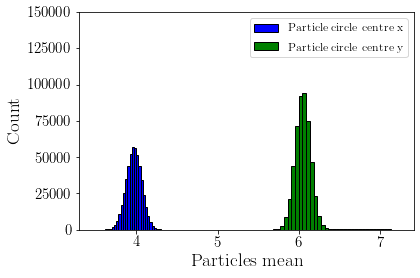

In [95]:
fig, ax = plt.subplots(1,1)
plt.hist(x_list, color = 'blue', edgecolor = 'black',
         bins = int(180/5), label = 'Particle circle centre x')
plt.hist(y_list, color = 'green', edgecolor = 'black',
         bins = int(180/5), label = 'Particle circle centre y')
plt.ylim((0,150000))
plt.ylabel('Count')
plt.xlabel('Particles mean')
plt.legend(fontsize = 12)
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/hist1025052501000n5xy.png', format = 'png', dpi=400, bbox_inches='tight')

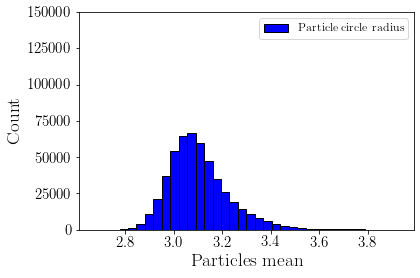

In [96]:
fig, ax = plt.subplots(1,1)
plt.hist(radius_list, color = 'blue', edgecolor = 'black',
         bins = int(180/5), label = 'Particle circle radius')
plt.ylim((0,150000))
plt.ylabel('Count')
plt.xlabel('Particles mean')
plt.legend(fontsize = 12)
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/hist1025052501000n5r.png', format = 'png', dpi=400, bbox_inches='tight')

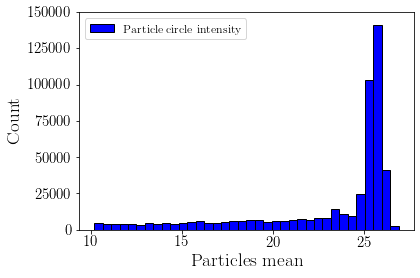

In [97]:
fig, ax = plt.subplots(1,1)
plt.hist(intensity_list, color = 'blue', edgecolor = 'black',
         bins = int(180/5), label = 'Particle circle intensity')
plt.ylim((0,150000))
plt.ylabel('Count')
plt.xlabel('Particles mean')
plt.legend(fontsize = 12)
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/hist1025052501000n5i.png', format = 'png', dpi=400, bbox_inches='tight')

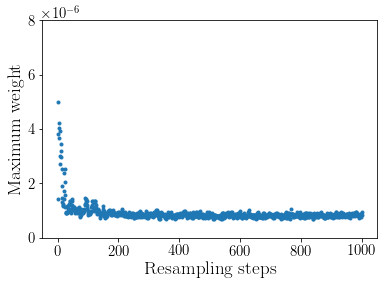

In [32]:
fig, ax = plt.subplots(1,1)
plt.plot([np.var(w) for w in weights], '.')
plt.ylim(0.00,0.8*10**-5)
plt.ylabel('Maximum weight')
plt.xlabel('Resampling steps')
fig.savefig('/Users/anamaria/Desktop/thesis_pictures/smc/weightsvar1010055001000n0_5.png', format = 'png', dpi=400, bbox_inches='tight')